# Machine Learning Algorithms: Linear Regression

Linear regression is one of the most simple and popular algorithms where the output is in a continuous range such as salary, age, weight, or height and not classified into categories. The goal is to show a linear relationship between a single dependent (y) and one, called simple/univariate linear regression, or more, called multiple linear regression, independent variables (x) by fitting a line between them called the regression line. In less words, a linear regression model uses a straight line to fit the model. With linear regression, we can predict continuous values with a constant slope.

Let’s say, we want to predict the weight of something according to the height of something or maybe the price of a house (y) according to the size of the house (x). We can imagine that y is linearly dependent on x and we can create a straight line with an equation looking like y = ax + b:

h_θ (x)= y= θ_0+ θ_1 x

Where h_θ is the hypothesis function, x is the independent variable, θ_0 and θ_1 are the regression coefficient (the parameters that need to be learnt).

For multiple linear regression with several independent features (x) and a single dependent feature (y) the equation would be:

h_θ (x)= y= θ_0+ θ_1 x_1+ θ_2 x_2+⋯+ θ_n x_n  


## Simple Linear Regression: Scikit-Learn

To illustrate what we described above, let’s implement a simple linear regression with scikit-learn (LinearRegression()) by generating a random dataset.

Slope: [[1.94369415]]
Intercept: [4.5193723]
Root mean squared error:  0.08610037959679763
R2 score:  0.7795855368773891


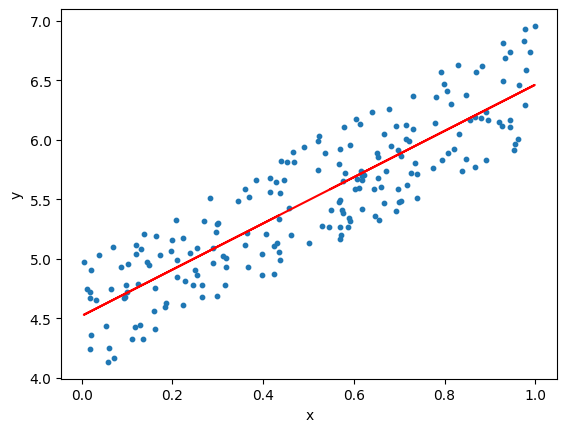

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate random data-set
np.random.seed(0)
# There will be 200 data points ranging from 0 to 200
x = np.random.rand(200, 1)
y = 4 + 2 * x + np.random.rand(200, 1)

# Sckit-learn implementation

# Model initialization
linear_regression_model = LinearRegression()
# Fit the data (train the model)
linear_regression_model.fit(x, y)
# Model prediction
y_predicted = linear_regression_model.predict(x)

# Model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# Printing Slope, Intercept, RMSE and R2
print('Slope:' ,linear_regression_model.coef_)
print('Intercept:', linear_regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# Plotting data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# Predicted values (regression line)
plt.plot(x, y_predicted, color='r')
plt.show()

## Simple Linear Regression: TensorFlow

Now, let’s implement a simple linear regression with TensorFlow by generating a random dataset. We use Gradient Descent, a learning rate of 0.01 and number of epochs 1000.

Epoch: 0050 cost= 4.046965122 W= 1.706719 b= 1.8089526
Epoch: 0100 cost= 1.194122195 W= 2.2308412 b= 2.860583
Epoch: 0150 cost= 0.389478743 W= 2.4960198 b= 3.4254918
Epoch: 0200 cost= 0.161574528 W= 2.6242018 b= 3.7319198
Epoch: 0250 cost= 0.096121721 W= 2.6800892 b= 3.900989
Epoch: 0300 cost= 0.076482169 W= 2.698006 b= 3.9969735
Epoch: 0350 cost= 0.069815665 W= 2.696131 b= 4.053974
Epoch: 0400 cost= 0.066869356 W= 2.684106 b= 4.090116
Epoch: 0450 cost= 0.065035000 W= 2.66703 b= 4.115022
Epoch: 0500 cost= 0.063579634 W= 2.6476405 b= 4.1337013
Epoch: 0550 cost= 0.062286984 W= 2.6273458 b= 4.1489716
Epoch: 0600 cost= 0.061094362 W= 2.606832 b= 4.16219
Epoch: 0650 cost= 0.059985477 W= 2.5866368 b= 4.1741753
Epoch: 0700 cost= 0.058943462 W= 2.5668473 b= 4.1854954
Epoch: 0750 cost= 0.057964716 W= 2.5475132 b= 4.196224
Epoch: 0800 cost= 0.057046860 W= 2.5287216 b= 4.2064776
Epoch: 0850 cost= 0.056184921 W= 2.5104952 b= 4.216401
Epoch: 0900 cost= 0.055373792 W= 2.492721 b= 4.225916
Epoch: 095

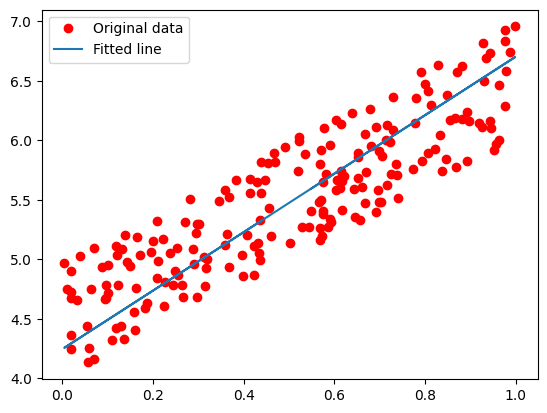

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
# Generating random linear data
np.random.seed(0)
# There will be 200 data points ranging from 0 to 200
train_X = np.random.rand(200, 1)
train_Y = 4 + 2 * train_X + np.random.rand(200, 1)

n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Multiple Linear Regression: Scikit-learn

In the real life, we rarely have one single independent variable and clean data. To illustrate multiple linear regression, we will use the California Cooperative Oceanic Fisheries Investigations (CalCOFI) data set representing the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world (https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv). This dataset became valuable for documenting climatic cycles locally. For the purpose of our exercise, we will extract the following variables:
    - Depthm: depth in meters
    - T_degC: water temperature in degree Celsius
    - Salnty: salinity in g of salt per kg of water (g/kg)
    - O2ml_L: O2 mixing ration in ml/L
With this data, we can already ask some question such as if there is a relationship between water salinity and water temperature or can we predict the water temperature based on salinity and depth in meters. Let’s use the water temperature (T_DegC) as our dependent variable (target).

To start, let’s capture the dataset using Pandas DataFrame, drop rows having at least one missing value, split the data into the variable we want to predict (T_degC) and the selected features (Depthm, Salnty, O2ml_L).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '/content/sample_data/bottle.csv'
df = pd.read_csv(csv_data, delimiter=',')

# Select the variables we want to keep: 'Depthm','T_degC','Salnty','O2ml_L'
df = df[['Depthm','T_degC','Salnty','O2ml_L']]

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (T_degC) and X the features (Depthm, SaInty, O2ml_L)
#y = pd.DataFrame(df.loc[:, df.columns == 'T_degC'], columns = ["T_degC"])
#X = pd.DataFrame(df.loc[:, df.columns != 'T_degC'])
y = df.loc[:, df.columns == 'T_degC']
X = df.loc[:, df.columns != 'T_degC']

y, X

/tmp/ipython-input-2538545091.py:7: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_data, delimiter=',')


(        T_degC
 2160    10.300
 2161    18.460
 2162    10.290
 2163    10.290
 2164    10.330
 ...        ...
 864858  18.744
 864859  18.744
 864860  18.692
 864861  18.161
 864862  17.533
 
 [661489 rows x 1 columns],
         Depthm   Salnty  O2ml_L
 2160         0  33.0300   5.900
 2161         6  32.9200   6.020
 2162        10  32.9510   6.040
 2163        15  32.9900   6.060
 2164        20  33.0050   6.040
 ...        ...      ...     ...
 864858       0  33.4083   5.805
 864859       2  33.4083   5.805
 864860       5  33.4150   5.796
 864861      10  33.4062   5.816
 864862      15  33.3880   5.774
 
 [661489 rows x 3 columns])

Before doing the linear regression model, we can check visually if a linear relationship exists between variables:  T_degC vs Depthm, T_degC vs Salnty, T_degC vs O2ml_L. To do this, we can compute some scatter diagrams with the matplotlib library by adding the lines below.

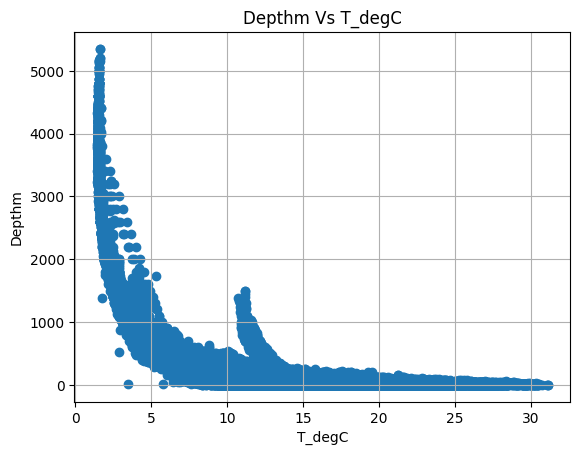

In [6]:
# Plot diagrams with the matplotlib library.
plt.scatter(y,X['Depthm'])
plt.title('Depthm Vs T_degC')
plt.xlabel('T_degC')
plt.ylabel('Depthm')
plt.grid(True)

plt.show()

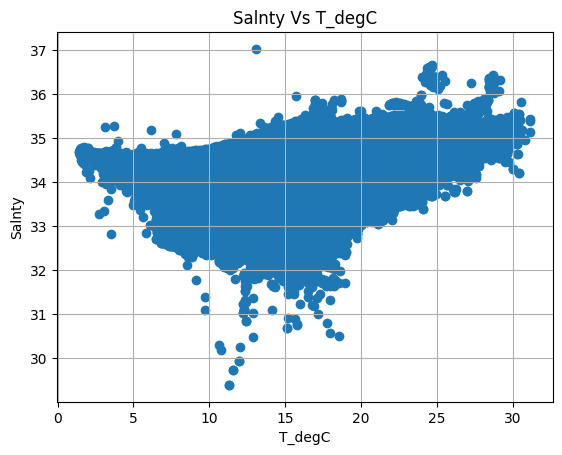

In [7]:
plt.scatter(y,X['Salnty'])
plt.title('Salnty Vs T_degC')
plt.xlabel('T_degC')
plt.ylabel('Salnty')
plt.grid(True)
plt.show()

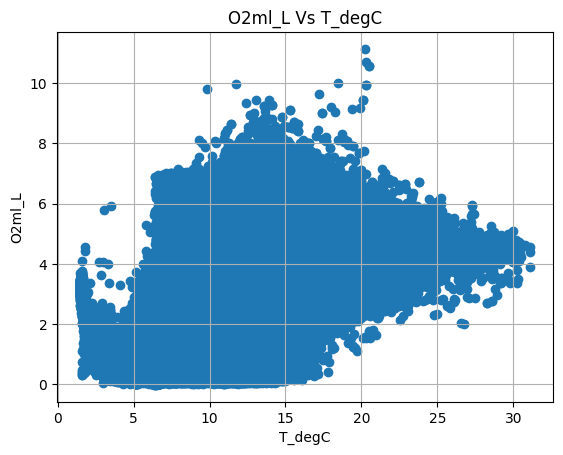

In [8]:
plt.scatter(y,X['O2ml_L'])
plt.title('O2ml_L Vs T_degC')
plt.xlabel('T_degC')
plt.ylabel('O2ml_L')
plt.grid(True)
plt.show()

As we can see, there is no linearity between T_degC and Depthm. We will drop the Depthm variable from our linear regression model and start divide the data between the variable to predict T_DegC and both features Depthm and Salnty.

To apply linear regression to the data and find the intercept and coefficients, we can use sklearn.

In [9]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '/content/sample_data/bottle.csv'
df = pd.read_csv(csv_data, delimiter=',')

# Select the variables we want to keep: 'Depthm','T_degC','Salnty','O2ml_L'
df = df[['T_degC','Salnty','O2ml_L']]

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (T_degC) and X the features (Depthm, SaInty, O2ml_L)
y = df.loc[:, df.columns == 'T_degC']
X = df.loc[:, df.columns != 'T_degC']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
Normalize = preprocessing.Normalizer()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

# Compute a linear regression model with sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Compute and print predicted output with X_test as inputs
print('\n')
print ('Predicted T_degC: \n', regr.predict(X_test))

# To save the model for future use
from joblib import dump, load
dump(regr, 'linear_regression.joblib')

# To load the model when needed
regr = load('linear_regression.joblib')

/tmp/ipython-input-1567211191.py:8: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_data, delimiter=',')


Intercept: 
 [143.98894321]
Coefficients: 
 [[-138.18191503   41.17953079]]


Predicted T_degC: 
 [[15.24926345]
 [ 8.14078918]
 [ 9.9864041 ]
 ...
 [15.81746572]
 [ 7.8816554 ]
 [ 7.53595955]]


As we probably saw, there is no learning rate as this is not learned with Gradient Descent. In addition, the regressors X are normalized before regression by subtracting the mean and divinding by the l2-norm. We can use different scaling method. For example, we can use SandardScaler before calling fit.

A linear model fitted by minimizing a regularized empirical loss Stochastic Gradient Descent is possible by using SGDRegressor in scikit learn. The default value of the learning rate is 0.01.

In [11]:
# Importing. libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '/content/sample_data/bottle.csv'
df = pd.read_csv(csv_data, delimiter=',')

# Select the variables we want to keep: 'Depthm','T_degC','Salnty','O2ml_L'
df = df[['T_degC','Salnty','O2ml_L']]

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (T_degC) and X the features (Depthm, SaInty, O2ml_L)
y = pd.DataFrame(df.loc[:, df.columns == 'T_degC'], columns = ["T_degC"])
X = pd.DataFrame(df.loc[:, df.columns != 'T_degC'])

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
Normalize = preprocessing.StandardScaler()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

# with sklearn
from sklearn import linear_model
regr = linear_model.SGDRegressor(learning_rate = 'constant', max_iter=1000, tol=1e-3)
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Prediction with sklearn
print ('Predicted T_degC: \n', regr.predict(X_test))

# To save the model for future use
from joblib import dump, load
dump(regr, 'linear_regression.joblib')

# To load the model when needed
regr = load('linear_regression.joblib')

/tmp/ipython-input-3856408074.py:9: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_data, delimiter=',')
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept: 
 [11.0048718]
Coefficients: 
 [2.36989594 5.05188026]
Predicted T_degC: 
 [16.25350671  8.42810102 10.50506071 ... 16.94505682  7.38697484
  8.114558  ]


## Multiple Linear Regression: Statsmodels

It is also possible to display a comprehensive table with statistical information generated by statsmodels providing insights about our model. Let’s just add few more lines.

In [13]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np # Import numpy as it's used in the last print statement

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '/content/sample_data/bottle.csv'
df = pd.read_csv(csv_data, delimiter=',')

# Select the variables we want to keep: 'Depthm','T_degC','Salnty','O2ml_L'
df = df[['T_degC','Salnty','O2ml_L']]

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (T_degC) and X the features (Depthm, SaInty, O2ml_L)
y = df.loc[:, df.columns == 'T_degC']
X = df.loc[:, df.columns != 'T_degC']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
Normalize = preprocessing.Normalizer()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

# with statsmodels
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print_model = model.summary()
print(print_model)

print('Statsmodels parameters:')
print(np.round(model.params, 3)) # Corrected from reg.params to model.params
print('\n')

/tmp/ipython-input-2783048909.py:9: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_data, delimiter=',')


                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 4.463e+05
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        08:10:23   Log-Likelihood:            -1.2519e+06
No. Observations:              529191   AIC:                         2.504e+06
Df Residuals:                  529188   BIC:                         2.504e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.9889      2.611     55.142      0.0

## Multiple Linear Regression: TensorFlow

As we will see, computing a linear regression on the same data with TensorFlow will of course provide the same results but it is also a way to learn some vector and matrix operations (multiplication, transpose, inverse, etc.) in TensorFlow. We will see that it is quite similar to that of np.array with some differences.

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf

# Print number of GPUs available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# For future use, which devices the operations and tensors are assigned to (GPU, CPU)
tf.debugging.set_log_device_placement(True)

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '/content/sample_data/bottle.csv'
df = pd.read_csv(csv_data, delimiter=',')

# Select the variables we want to keep: 'Depthm','T_degC','Salnty','O2ml_L'
df = df[['T_degC','Salnty','O2ml_L']]

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (T_degC) and X the features (Depthm, SaInty, O2ml_L)
y = df.loc[:, df.columns == 'T_degC'].values.ravel()
X = df.loc[:, df.columns != 'T_degC']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
Normalize = preprocessing.Normalizer()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

# Shape of the data (number of rows and columns)
nrow, ncol = X_train.shape; print (nrow, ncol)
nparam = ncol+1 # number of parameters

# Keep columns name for table of results
row_name_results = [['Intercept', 'Salnty','O2ml_L']]

########## Using sklearn
from sklearn import linear_model
reg_mod = linear_model.LinearRegression()
reg_mod.fit(X_train, y_train)

df_results_sk = pd.DataFrame(
    np.hstack([reg_mod.intercept_, reg_mod.coef_]))
df_results_sk.columns = ["estimate"]
df_results_sk.index   = row_name_results
print("\n############### using sklearn ###############")
print(df_results_sk)

########## Using statsmodels
import statsmodels.api as sm
Xw1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, Xw1)
fit = ols.fit()

df_results_sm = pd.DataFrame(np.vstack([fit.params,
                fit.bse, fit.params/fit.bse]).T)
df_results_sm.columns = ["estimate", "std.err", "t-stats"]
df_results_sm.index   = row_name_results

print("\n############### using statsmodels ###############")
print(df_results_sm)

########## Using matrix formula (np.array)

mX    = np.column_stack([np.ones(nrow),X_train])
beta  = np.linalg.inv(mX.T.dot(mX)).dot(mX.T).dot(y_train)
err   = y_train - mX.dot(beta)

s2    = err.T.dot(err)/(nrow - ncol - 1)
cov_beta = s2*np.linalg.inv(mX.T.dot(mX))
std_err  = np.sqrt(np.diag(cov_beta))

df_results_np = pd.DataFrame(
    np.row_stack((beta, std_err, beta/std_err)).T)
df_results_np.columns = ["estimate", "std.err", "t-stats"]
df_results_np.index   = row_name_results

print("\n############### using np.array ###############")
print(df_results_np)

########## Using matrix formula (Tensorflow)

import tensorflow as tf
tf.compat.v1.disable_eager_execution() # Disable eager execution

# from np.array
y_train = tf.constant(y_train, shape=[nrow, 1], dtype=tf.float64)
X_train = tf.constant(X_train, shape=[nrow, ncol], dtype=tf.float64)

# need double tensor
one  = tf.cast(tf.ones([nrow, 1]), tf.float64)
oneX = tf.concat([one, X_train], 1); # 1, X

XtX  = tf.matmul(oneX, oneX ,transpose_a=True)
Xty  = tf.matmul(oneX, y_train  ,transpose_a=True)
beta = tf.matmul(tf.linalg.inv(XtX),Xty)
err  = y_train - tf.matmul(oneX, beta)
s2   = tf.matmul(err, err, transpose_a=True)/(nrow - nparam)
cov_beta = s2*tf.linalg.inv(XtX)
std_err  = tf.sqrt(tf.linalg.diag_part(cov_beta))
beta = tf.reshape(beta,[nparam])

est_out   = tf.stack([beta, std_err, beta/std_err],1)

with tf.compat.v1.Session() as sess:
    est_out_np = sess.run(est_out)

df_results_tf = pd.DataFrame(est_out_np)
df_results_tf.columns = ["estimate", "std.err", "t-stats"]
df_results_tf.index   = row_name_results

print("\n############### using Tensorflow ###############")
print(df_results_tf)

Num GPUs Available:  0


/tmp/ipython-input-3498299782.py:13: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_data, delimiter=',')


529191 2

############### using sklearn ###############
             estimate
Intercept  143.988943
Salnty    -138.181915
O2ml_L      41.179531

############### using statsmodels ###############
             estimate   std.err     t-stats
Intercept  143.988943  2.611227   55.142251
Salnty    -138.181915  2.603864  -53.068028
O2ml_L      41.179531  0.260148  158.292511

############### using np.array ###############
             estimate   std.err     t-stats
Intercept  143.988944  2.611227   55.142251
Salnty    -138.181915  2.603864  -53.068029
O2ml_L      41.179531  0.260148  158.292511
Device mapping: no known devices.


/tmp/ipython-input-3498299782.py:79: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  np.row_stack((beta, std_err, beta/std_err)).T)



############### using Tensorflow ###############
             estimate   std.err     t-stats
Intercept  143.988944  2.611227   55.142251
Salnty    -138.181916  2.603864  -53.068029
O2ml_L      41.179531  0.260148  158.292511


## Multiple Linear Regression: Keras on TensorFlow

Let’s now implement a multiple linear regression with Keras on TensorFlow. The approach is quite similar as scikit-learn. We capture the dataset in Python using Pandas DataFrame, we select the variables we want to work with, we drop rows having at least one missing value, we divide the data with a target variable and the features, we can split the data to have training and test data, we scale the data, and we create a sequential model. The sequential layer allows stacking of one layer on top of the other, enabling the data to flow through them. We use mini-batch gradient descent optimizer and mean square loss. Finally, we check the performance by looking to the loss over time. We should see that the loss is reduced over time.

First example with univariate linear regression

In [27]:
# Importing the libraries
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")
print(f"Eager execution enabled: {tf.executing_eagerly()}")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '/content/sample_data/bottle.csv'
df = pd.read_csv(csv_data, delimiter=',')

# Select the variables we want to keep: 'T_degC','Salnty','O2ml_L'
df = df[['T_degC','Salnty','O2ml_L']]

# Drop rows having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (T_degC) and X the features (Salnty)
y = df['T_degC'].values
X = df['Salnty'].values.reshape(-1, 1)  # Reshape to 2D array for sklearn compatibility

# Splitting the data: training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify data structure
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Creating a Sequential Model with TF2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# As we have only one feature, input_dim = 1
model.add(Dense(1, input_dim=1, activation='linear'))

# We use mini-batch gradient descent optimizer and mean square loss
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001), loss='mse')  # Fixed: Use string 'mse' instead of function

# Train the model
train = model.fit(X_train, y_train, epochs=50)

# Performance Analysis: loss over time
plt.figure(figsize=(10, 6))
plt.plot(train.history['loss'], label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training Loss Over Time')
plt.show()

# Testing the model and print the predictions
y_pred = model.predict(X_train)

# Our linear equation with weights and bias
w0 = model.layers[0].get_weights()[0][0][0]  # Fixed: Added extra [0] for proper indexing
b = model.layers[0].get_weights()[1][0]      # Fixed: Added [0] for proper indexing

print("Linear Regression Equation: %.6f * X + %.6f" % (w0, b))

# Plot the model (regression line in green)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='blue', alpha=0.6, label='Training Data')
plt.plot(X_train, y_pred, color='green', label='Model Prediction', linewidth=2)

# Plot the linear equation in red (will overlap with green line)
plt.plot(X_train, w0*X_train + b, color='red', linestyle='--', alpha=0.7, label='Linear Equation')

plt.xlabel('Salinity (X_train)')
plt.ylabel('Temperature (y_train)')
plt.legend()
plt.title('Linear Regression: Temperature vs Salinity')
plt.show()

# Let's predict new values using test data
new_predictions = model.predict(X_test)
print("Predictions on test data:")
print(new_predictions.flatten())  # Flatten to make output cleaner

# Evaluate model performance on test data
from sklearn.metrics import mean_squared_error, r2_score
mse_score = mean_squared_error(y_test, new_predictions)
r2 = r2_score(y_test, new_predictions)

print(f"\nModel Performance on Test Data:")
print(f"Mean Squared Error: {mse_score:.6f}")
print(f"R² Score: {r2:.6f}")

# Save our model for future use
# model.save('../Outputs/keras_linear_model')

TensorFlow version: 2.19.0
Eager execution enabled: False


/tmp/ipython-input-1524068539.py:11: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_data, delimiter=',')


X_train shape: (529191, 1)
y_train shape: (529191,)
X_test shape: (132298, 1)
y_test shape: (132298,)
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

In [23]:
# We can also print the true values (y_test) versus predicted values (new_predictions)
import tensorflow as tf
tf.config.experimental_run_eagerly(True)

# Make predictions with X_test
y_pred_new = model.predict(X_test)
plt.scatter(y_test,y_pred_new,color='b')
plt.show()

RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.

Multiple Linear Regression with two Independent Variables

In [21]:
# Importing the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

# load data: Capture the dataset in Python using Pandas DataFrame
csv_data = '/content/sample_data/bottle.csv'
df = pd.read_csv(csv_data, delimiter=',', low_memory=False)

# Select the variables we want to keep: 'Depthm','T_degC','Salnty','O2ml_L'
df = df[['T_degC','Salnty','O2ml_L']]

# Drop row having at least 1 missing value
df = df.dropna()

# Divide the data, y the variable to predict (T_degC) and X the features (Depthm, SaInty, O2ml_L)
y = df.loc[:, df.columns == 'T_degC']
X = df.loc[:, df.columns != 'T_degC']

# Splitting the data : training and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
Normalize = preprocessing.Normalizer()
# Transform data
X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

# Creating a Sequential Model with TF2
# Sequential Layer allows stacking of one layer on top of the other , enabling the data to flow through them
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# We have two inputs for our model: 'Salnty' and 'O2ml_L' features
model = Sequential()
model.add(Dense(1, input_dim = 2, activation = 'linear'))
#model.summary() # Commented out to avoid TypeError

# Optimizer and Gradient Descent
# We use mini-batch gradient descent optimizer and mean square loss
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse
model.compile(optimizer=SGD(learning_rate=0.01),loss=mse)
train = model.fit(X_train,y_train,epochs=10)

# Performance Analysis: loss over time
# We should see that the loss is reduced over time
plt.plot(train.history['loss'],label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Model prediction
y_pred = model.predict(X_train)

# Extracting the weights and biases is achieved quite easily
model.layers[0].get_weights()

# We can save the weights and biases in separate variables
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print('Intercept and Weights from keras model')
print("Intercept:")
print(bias)
print("Weights:")
print(weights)
print('\n')

# Model evaluation using scikit-learn tooling
from sklearn.metrics import mean_squared_error, r2_score
print('Keras model evaluation:')
rmse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

# Printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('\n')

# Make predictions with X_test
y_pred_new = model.predict(X_test)
print('predictions:')
print(y_pred_new)
print('\n')

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RuntimeError: `tf.data.Dataset` only supports Python-style iteration in eager mode or within tf.function.